# Predicting Breast Cancer 
## Part 5 : Model Evaluation
### 1. Load Modules

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt 
from helper_functions import test_class_set, test_class_set_scaled, print_class_report
import random_forest as rf
import knn
import neural_networks as nn
from terminaltables import AsciiTable
from sklearn.metrics import classification_report
import pandas as pd
import helper_functions as hf

pd.set_option('display.max_columns', 500) 
# Included to show all the columns 
# since it is a fairly large data set

plt.style.use('ggplot') # Using ggplot2 style visuals 

### 2. Loading Data

In [9]:
breast_cancer = hf.breast_cancer

In [10]:
# dimensions of our data frame
breast_cancer.shape

(569, 31)

In [11]:
# data types of our columns 
breast_cancer.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave_points_worst

### 3. Fitting model

In [12]:
# Creating useful dicts or lists
pred_dict = {'predictions': 'Kth Nearest Neighbor', 
             'predictions_rf': 'Random Forest', 
             'predictions_nn': 'Neural Networks'
            }

In [13]:
# Calling up metrics from the model scripts
fpr, tpr, auc_knn, predictions, test_error_rate = knn.return_knn()

fpr2, tpr2, auc_rf, predictions_rf, test_error_rate_rf = rf.return_rf()

fpr3, tpr3, auc_nn, predictions_nn, test_error_rate_nn =nn.return_nn()

Classification Report for Kth Nearest Neighbor:
Value entered not within the scope of the algorithms used!
Classification Report for Random Forest:
Value entered not within the scope of the algorithms used!
Classification Report for Neural Networks:
Value entered not within the scope of the algorithms used!
Comparison of different logistics relating to model evaluation:
+----------------------+-----------------+-----------------------------+------------------------------+-------------------------------+
| Model/Algorithm      | Test Error Rate | False Negative for Test Set | Area under the Curve for ROC | Cross Validation Score        |
+----------------------+-----------------+-----------------------------+------------------------------+-------------------------------+
| Kth Nearest Neighbor | 0.07            | 5                           | 0.929                        | Accuracy:  0.925 (+/-  0.025) |
| Random Forest        | 0.035           | 3                           | 0.967     

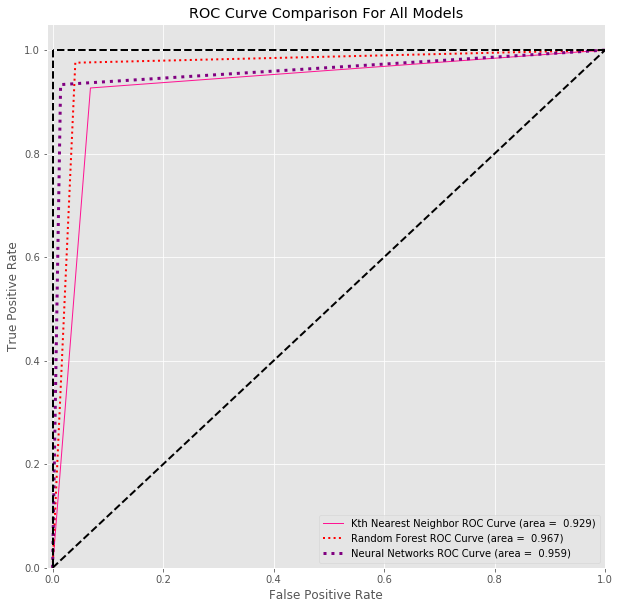

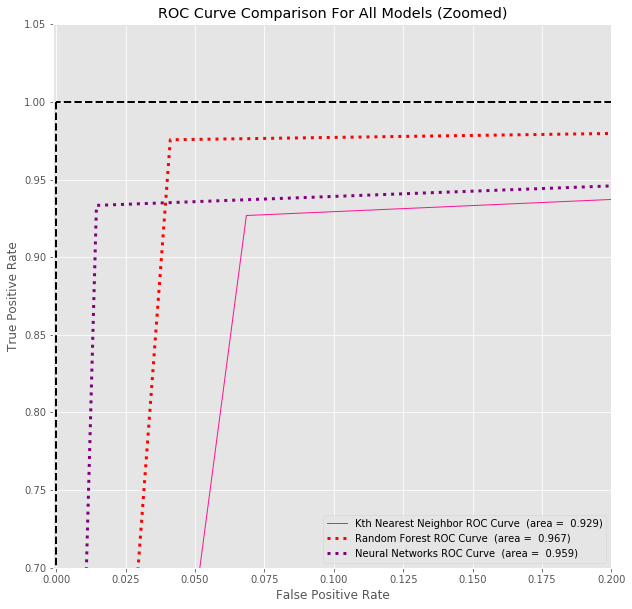

The end 
:)


In [15]:
if __name__ == '__main__':
    # Populate list for human readable table from terminal line
    table_data = [
        [ 'Model/Algorithm', 'Test Error Rate', 
         'False Negative for Test Set', 'Area under the Curve for ROC', 
         'Cross Validation Score'],
        ['Kth Nearest Neighbor',  round(test_error_rate, 3), 5, 
         round(auc_knn, 3), "Accuracy: {0: 0.3f} (+/- {1: 0.3f})"
         .format(knn.mean_cv_knn, knn.std_error_knn)
        ],
        [ 'Random Forest', round(test_error_rate_rf, 3), 3, 
         round(auc_rf, 3), "Accuracy: {0: 0.3f} (+/- {1: 0.3f})"
         .format(rf.mean_cv_rf, rf.std_error_rf)
        ], 
        [ 'Neural Networks' ,  round(test_error_rate_nn, 3),  1, 
         round(auc_nn, 3), "Accuracy: {0: 0.3f} (+/- {1: 0.3f})"
         .format(nn.mean_cv_nn, nn.std_error_nn)
        ]]

    # convert to AsciiTable from terminaltables package
    table = AsciiTable(table_data)
    
    target_names = ['Benign', 'Malignant']
    
    for key, value in pred_dict.items():
        hf.print_class_report(key, value)


    print("Comparison of different logistics relating to model evaluation:")
    print(table.table)

    # Plotting ROC Curves
    f, ax = plt.subplots(figsize=(10, 10))
    
    plt.plot(fpr, tpr, label='Kth Nearest Neighbor ROC Curve (area = {0: .3f})'
             .format(auc_knn), 
             color = 'deeppink', 
             linewidth=1)
    plt.plot(fpr2, tpr2,label='Random Forest ROC Curve (area = {0: .3f})'
             .format(auc_rf), 
             color = 'red', 
             linestyle=':', 
             linewidth=2)
    plt.plot(fpr3, tpr3,label='Neural Networks ROC Curve (area = {0: .3f})'
             .format(auc_nn), 
             color = 'purple', 
             linestyle=':', 
             linewidth=3)
    
    #ax.set_axis_bgcolor('#fafafa')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison For All Models')
    plt.legend(loc="lower right")	
    plt.show()

    # Zoomed in
    f, ax = plt.subplots(figsize=(10, 10))
    plt.plot(fpr, tpr, label='Kth Nearest Neighbor ROC Curve  (area = {0: .3f})'
             .format(auc_knn), 
             color = 'deeppink', 
             linewidth=1)
    plt.plot(fpr2, tpr2,label='Random Forest ROC Curve  (area = {0: .3f})'
             .format(auc_rf), 
             color = 'red', 
             linestyle=':', 
             linewidth=3)
    plt.plot(fpr3, tpr3,label='Neural Networks ROC Curve  (area = {0: .3f})'
             .format(auc_nn), 
             color = 'purple', 
             linestyle=':', 
             linewidth=3)
    
    #ax.set_axis_bgcolor('#fafafa')
    plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line
    plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
    plt.xlim([-0.001, 0.2])
    plt.ylim([0.7, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison For All Models (Zoomed)')
    plt.legend(loc="lower right")	
    plt.show()
    
    print('The end \n:)')